#### Team Members: Sudarshan Guttula, Stanley Do

### Read the Kobe "data.csv" data file and assign to Pandas DataFrame

In [1]:
import numpy as np
import pandas as pd

original_df = pd.read_csv('data.csv')
print('Number of original rows: ', len(original_df.index))

display(original_df.isnull().sum())

kobe_df = pd.read_csv('data.csv').dropna()
print('Number of rows after dropping: ', len(kobe_df.index))

Number of original rows:  30697


action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

Number of rows after dropping:  25697


### Check the dataset

In [2]:
## Print every 10 lines
kobe_df[0::10]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/3/1996,LAL vs. MIN,MIN,22902
12,Driving Layup Shot,Layup,384,29600057,34.0443,0,0,-118.2698,8,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/8/1996,LAL @ TOR,TOR,22914
22,Layup Shot,Layup,146,29600112,34.0443,0,0,-118.2698,8,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/15/1996,LAL vs. LAC,LAC,22924
38,Jump Shot,Jump Shot,460,29600144,33.8413,131,203,-118.1388,1,4,...,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,11/20/1996,LAL vs. UTA,UTA,22940
50,Layup Shot,Layup,170,29600187,34.0443,0,0,-118.2698,5,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/27/1996,LAL @ BOS,BOS,22952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30641,Jump Bank Shot,Jump Shot,85,21501209,33.9293,-225,115,-118.4948,4,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,4/11/2016,LAL @ OKC,OKC,22846
30653,Pullup Jump shot,Jump Shot,69,21501228,33.8903,-32,154,-118.3018,4,1,...,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,4/13/2016,LAL vs. UTA,UTA,22858
30664,Jump Shot,Jump Shot,221,21501228,33.9243,-217,120,-118.4868,2,2,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,4/13/2016,LAL vs. UTA,UTA,22869
30676,Pullup Jump shot,Jump Shot,311,21501228,34.0503,122,-6,-118.1478,5,3,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,4/13/2016,LAL vs. UTA,UTA,22881


### Build feature matrix and label vector

In [3]:
## excluding categorical features
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date', 'shot_made_flag']

# remove unused features from feature set (only has 16 useful categorical AND numerical features)
used_features = [feature for feature in kobe_df.columns if feature not in unused_features]

categorical_features = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']
numerical_features = ['lat', 'lon', 'loc_x', 'loc_y', 'minutes_remaining', 'period', 'playoffs', 'seconds_remaining', 'shot_distance']

target = ['shot_made_flag']

y = kobe_df[target]
print(y.head(10))

X = kobe_df[numerical_features]
display(X.head(10))

    shot_made_flag
0              0.0
1              0.0
2              1.0
3              0.0
4              1.0
6              1.0
8              0.0
9              1.0
10             0.0
11             0.0


,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance
0,33.9283,-118.4098,-140,116,0,1,0,42,18
1,33.9473,-118.4008,-131,97,10,2,0,8,16
2,33.8633,-118.4118,-142,181,8,2,0,37,23
3,34.0443,-118.2698,0,0,6,2,0,34,0
4,33.9063,-118.2798,-10,138,5,2,0,27,13
6,33.8213,-118.3338,-64,223,2,2,0,16,23
8,33.8673,-118.3488,-79,177,1,3,0,53,19
9,33.8373,-118.3728,-103,207,1,3,0,14,23
10,34.0443,-118.2698,0,0,0,3,0,2,0
11,33.8693,-118.4248,-155,175,9,4,0,9,23


### Split the dataset into testing and training sets (Numerical features)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, 
                                                    random_state=6) 

### Logistic Regression (Without One-Hot Encoding) (Numerical)

In [5]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(solver='lbfgs', max_iter=2000)

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_predict_lr)
print('Logistic Regression: ' + str(accuracy))

Logistic Regression: 0.5959533073929961


### Include categorical features using OneHotEncoding

In [6]:
# The "new" X value
df_processed = pd.get_dummies(kobe_df[used_features], prefix_sep="__",
                              columns=categorical_features)

# df_processed is the new dataset with ALL features (categorical turned into numerical using OHE).
display(df_processed.head(10))

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_type__Alley Oop Dunk Shot,...,opponent__PHI,opponent__PHX,opponent__POR,opponent__SAC,opponent__SAS,opponent__SEA,opponent__TOR,opponent__UTA,opponent__VAN,opponent__WAS
0,33.9283,-140,116,-118.4098,0,1,0,42,18,0,...,0,0,0,0,0,0,0,0,0,0
1,33.9473,-131,97,-118.4008,10,2,0,8,16,0,...,0,0,0,0,0,0,0,0,0,0
2,33.8633,-142,181,-118.4118,8,2,0,37,23,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0443,0,0,-118.2698,6,2,0,34,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.9063,-10,138,-118.2798,5,2,0,27,13,0,...,0,0,0,0,0,0,0,0,0,0
6,33.8213,-64,223,-118.3338,2,2,0,16,23,0,...,0,0,0,0,0,0,1,0,0,0
8,33.8673,-79,177,-118.3488,1,3,0,53,19,0,...,0,0,0,0,0,0,1,0,0,0
9,33.8373,-103,207,-118.3728,1,3,0,14,23,0,...,0,0,0,0,0,0,1,0,0,0
10,34.0443,0,0,-118.2698,0,3,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
11,33.8693,-155,175,-118.4248,9,4,0,9,23,0,...,0,0,0,0,0,0,1,0,0,0


### Create a normalized data set after using OHE (Numerical and Categorical)

In [7]:
# Scale allows us to normalize the features
from sklearn.preprocessing import scale

# Get all of the current features in the data set
features_for_normalization = df_processed.columns

# Creates a dataframe from the scaled dataset 
df_processed_normalized = pd.DataFrame(data=scale(df_processed), columns=df_processed.columns)

# Display the data set that has been normalized
display(df_processed_normalized.head(10))

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_type__Alley Oop Dunk Shot,...,opponent__PHI,opponent__PHX,opponent__POR,opponent__SAC,opponent__SAS,opponent__SEA,opponent__TOR,opponent__UTA,opponent__VAN,opponent__WAS
0,-0.280687,-1.336850,0.280687,-1.336850,-1.415475,-1.320593,-0.413876,0.781168,0.483877,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,-0.148712,-0.224978,-0.089455,-0.141011
1,-0.065146,-1.255085,0.065146,-1.255085,1.481054,-0.452239,-0.413876,-1.159133,0.270852,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,-0.148712,-0.224978,-0.089455,-0.141011
2,-1.018063,-1.355020,1.018063,-1.355020,0.901748,-0.452239,-0.413876,0.495830,1.016442,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,-0.148712,-0.224978,-0.089455,-0.141011
3,1.035246,-0.064944,-1.035246,-0.064944,0.322443,-0.452239,-0.413876,0.324626,-1.433353,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,-0.148712,-0.224978,-0.089455,-0.141011
4,-0.530260,-0.155794,0.530260,-0.155794,0.032790,-0.452239,-0.413876,-0.074847,-0.048687,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,-0.148712,-0.224978,-0.089455,-0.141011
5,-1.494521,-0.646387,1.494521,-0.646387,-0.836169,-0.452239,-0.413876,-0.702592,1.016442,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,6.724405,-0.224978,-0.089455,-0.141011
6,-0.972686,-0.782662,0.972686,-0.782662,-1.125822,0.416115,-0.413876,1.408913,0.590390,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,6.724405,-0.224978,-0.089455,-0.141011
7,-1.313014,-1.000703,1.313014,-1.000703,-1.125822,0.416115,-0.413876,-0.816727,1.016442,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,6.724405,-0.224978,-0.089455,-0.141011
8,1.035246,-0.064944,-1.035246,-0.064944,-1.415475,0.416115,-0.413876,-1.501540,-1.433353,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,6.724405,-0.224978,-0.089455,-0.141011
9,-0.949998,-1.473126,0.949998,-1.473126,1.191401,1.284470,-0.413876,-1.102066,1.016442,-0.060915,...,-0.155015,-0.252051,-0.230087,-0.23977,-0.260926,-0.166603,6.724405,-0.224978,-0.089455,-0.141011


### Logistic Regression (With One-Hot Encoding) (Numerical and Categorical) WITH SAG Normalization

In [8]:
# Create testing and training sets of the normalized data with test_size = 0.25 and random_state = 6
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(df_processed_normalized, y.values.ravel(), test_size=0.5, 
                                                            random_state = 6)

# Create an instance of the logistic regression
my_logreg = LogisticRegression(solver='saga', max_iter=5000)

# Train the logreg on the training sets
my_logreg.fit(X_train_n, y_train_n)

y_predict_lr = my_logreg.predict(X_test_n)

accuracy = accuracy_score(y_test_n, y_predict_lr)
print('Logistic Regression with SAG: ', accuracy)

Logistic Regression with SAG:  0.6742158922873376


### Logistic Regression (With One-Hot Encoding) (Numerical and 'Categorical') WITH LBFGS Normalization

In [9]:

# This is where we create the training and testing sets.
# We are creating training and testing sets on the now fully numerical data set.
X_train, X_test, y_train, y_test = train_test_split(df_processed, y.values.ravel(), test_size=0.5, 
                                                    random_state=6)

# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_predict_lr)
print('Logistic Regression with LBFGS: ' + str(accuracy))

Logistic Regression with LBFGS: 0.6746050276286092


### Messing with AUC and ROC

FPR: [0.       0.       0.       ... 0.997468 0.997468 1.      ]
TPR: [0.00000000e+00 1.74216028e-04 5.22648084e-04 ... 9.99825784e-01
 1.00000000e+00 1.00000000e+00]
AUC: 0.6880356426044818


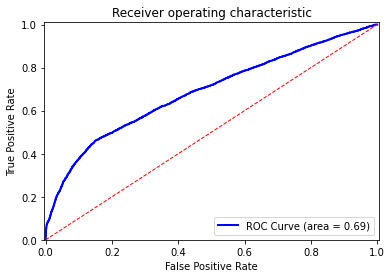

In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics

Prediction = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Prediction[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('FPR:', fpr)
print('TPR:', tpr)
print('AUC:', AUC)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')

# Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, and Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()